In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 


In [2]:
df = pd.read_csv('C:/Users/GBhardwaj02/Downloads/Upgrad/case study/loan/loan.csv')
df.shape

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(39717, 111)

### Calculate number of missing values in each column

In [3]:
dictionary = {}

for column in df:
    dictionary[column] = df[column].isna().sum()


### There are many columns which doesnt have any relevant values i.e. where na count > 32000 (~80% of 39717). Deleting these columns from the Dataframe

In [4]:
for key, val in dictionary.items():
    if(val > 32000):
        del df[key]


In [5]:
df.shape

(39717, 55)

### Now, since the dataframe has now less columns, save it as a new csv file to analyze the columns manually 

In [6]:
df.to_csv('C:/Users/GBhardwaj02/Downloads/Upgrad/case study/loan/loan1.csv')

It seems that there are various columns which has just single value. We need to delete the columns where there is a single value in all the columns as it doesnt adds any value to the analysis.

In [7]:
for column in df:
    if len((df[column].value_counts())) == 1:
                del df[column]

In [8]:
df.shape

(39717, 46)

### There are many columns which are Customer behavior variables which have relevancy post Loan approval. These variables will add no value to our analyses so can be safely deleted

In [9]:
cust_behavior = ["delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

In [10]:
df.drop(cust_behavior, axis = 1, inplace = True)

In [11]:
df.shape

(39717, 26)

In [12]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'mths_since_last_delinq', 'pub_rec_bankruptcies'],
      dtype='object')

### The columns - url, desc, zip_code, addr_state and emp_title are free text columns and these values cannot be used for any comparison purpose. Deleting these columns

In [13]:
df.drop(['url','desc','zip_code', 'addr_state'], axis = 1, inplace = True)

In [14]:
df.drop(['emp_title'], axis = 1, inplace = True)

In [15]:
df.shape

(39717, 21)

### The columns id and member_id are unique value identity columns just to identity the customer. We can delete the member_id column as we already have id column

In [16]:
df.drop(['member_id'], axis = 1, inplace = True)

In [17]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### The loan_status value 'Current' cannot be considered in the analysis as these customers can either get converted into 'Fully paid' or 'Charged Off'. We need to consider only the values where loan_status is not 'Current'

In [18]:
#Removing current loan status rows
df = df[df.loan_status != 'Current']

In [19]:
df.shape

(38577, 20)

### Now check the column types if any type conversion is needed to as to be used in Univariat and bivariat analyses

In [20]:
df.dtypes

id                          int64
loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
title                      object
dti                       float64
mths_since_last_delinq    float64
pub_rec_bankruptcies      float64
dtype: object

### There are many columns which shouldnt have been inferred as Object datatype. Need to analyse these columns if there are any extra characters/junk values which are not letting the columns to be type casted to float64. Clean the data and change it to meaningful datatype

In [21]:
df.term.unique()                       

array([' 36 months', ' 60 months'], dtype=object)

### The column term has just 2 values so we can leave it as it and we will treat it as a categorical value

In [22]:
df.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

Remove the '%' from the int_rate values and convert into float

In [23]:
df.int_rate =  pd.to_numeric(df.int_rate.str.replace('%',''))

In [24]:
df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [25]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [26]:
df['emp_length'].isna().sum()

1033

### There are two values i.e. 10+ and < 1 due to which the column cannot be converted to Float. We can treat experience < 1 as 1 (treating as 0 might mean that he is unemployed which is not the case) and 10+ years as 10. Lets do the conversion

In [27]:
df['emp_length'] = df['emp_length'].str.replace(' years','')

In [28]:
df['emp_length'] = df['emp_length'].str.replace(' year','')

In [29]:
df['emp_length'] = df['emp_length'].str.replace('< ','')

In [30]:
df['emp_length'] = pd.to_numeric(df['emp_length'].str.replace('+',''))

In [31]:
df['emp_length'].fillna("0",inplace=True)

### Need to delete column pub_rec_bankruptcies as this is also customer behavior attribute

In [32]:
del df['mths_since_last_delinq']

In [33]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [34]:
# fill pub_rec_bankruptcies na wil 0
df['pub_rec_bankruptcies'].fillna("0",inplace=True)

In [35]:
# deleting title columns as this is a free flow text column and doesnt provides any meaningful insight
del df['title']

### Derived columns - issue_month out of issue_d. Year will not be meaningful for our anaysis as it is not going to be repeated in future, only the pattern related months can add values

In [36]:
df['issue_month'] = df['issue_d'].str.split('-').apply(lambda x: x[0])

In [37]:
#delete the issue_d column as we dont need it any further
del df['issue_d']

### bucketing columns into categorical and continuous types - columns having less unique value count is categorical and others are continuous

In [38]:
for column in df:
    print(column, ' ', len(df[column].unique()))


id   38577
loan_amnt   870
funded_amnt   1019
funded_amnt_inv   8050
term   2
int_rate   370
installment   15022
grade   7
sub_grade   35
emp_length   11
home_ownership   5
annual_inc   5215
verification_status   3
loan_status   2
purpose   14
dti   2853
pub_rec_bankruptcies   4
issue_month   12


In [39]:
categorical_columns = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'pub_rec_bankruptcies', 'issue_month']

In [40]:
continuous_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', ]

### Plot categorical columns to see their distribution

------------- term ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


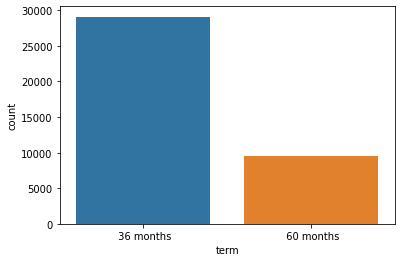

------------- grade ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


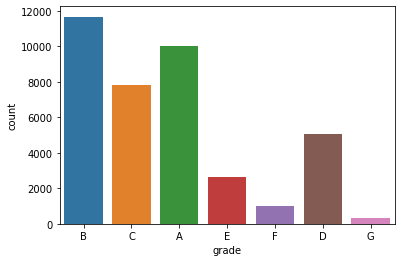

------------- sub_grade ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


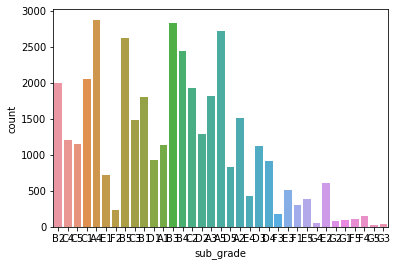

------------- emp_length ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


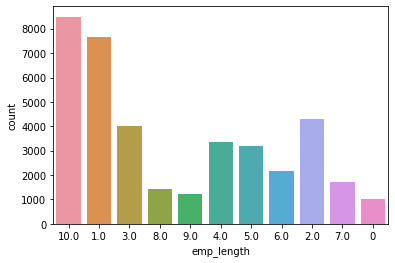

------------- home_ownership ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


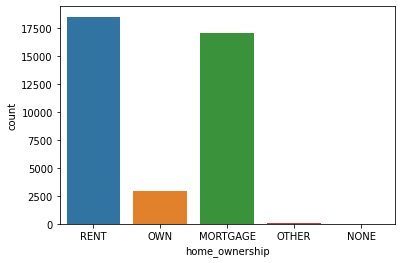

------------- verification_status ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


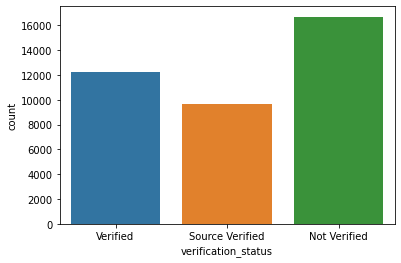

------------- loan_status ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


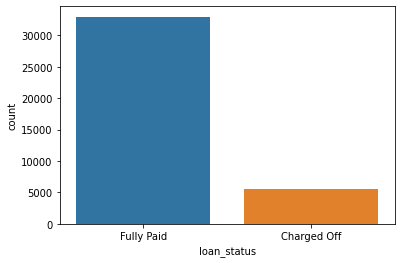

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


------------- purpose ------------------------


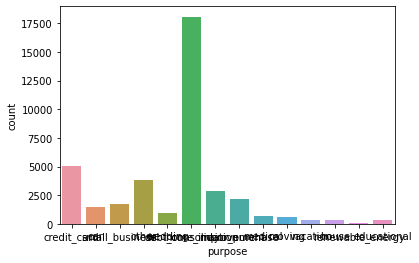

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


------------- pub_rec_bankruptcies ------------------------


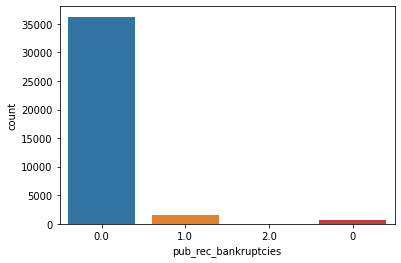

------------- issue_month ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


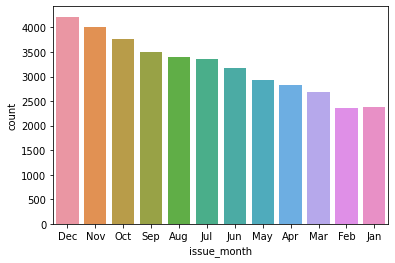

In [41]:
for i in categorical_columns:
    print("-------------", i, "------------------------")
    sns.countplot(df[i])
    plt.show()

## Removing outliers from continuous variable before Univariat analysis

#### box plot continuous variables to analyze outliers

------------- loan_amnt ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


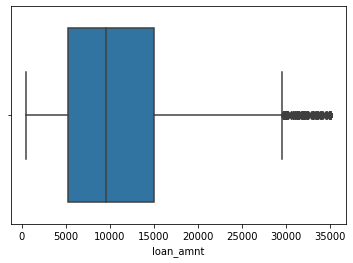

------------- funded_amnt ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


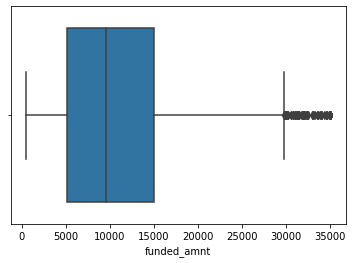

------------- funded_amnt_inv ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


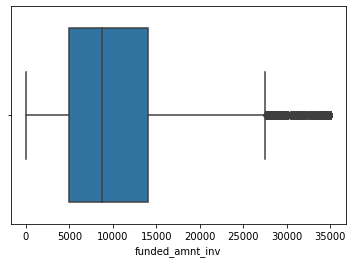

------------- int_rate ------------------------


C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


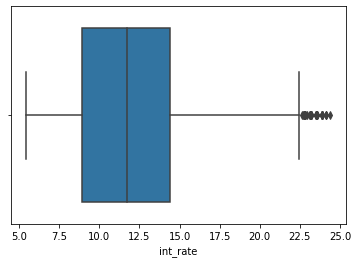

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


------------- installment ------------------------


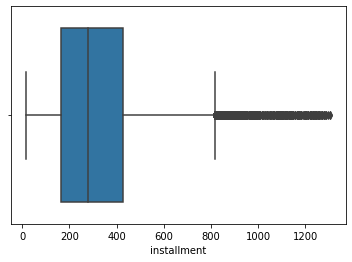

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


------------- annual_inc ------------------------


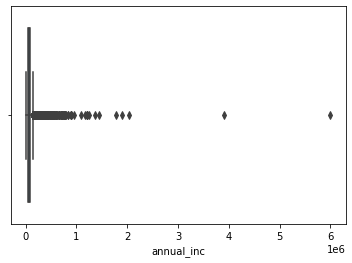

In [42]:
for i in continuous_columns:
    print("-------------", i, "------------------------")
    sns.boxplot(df[i])
    plt.show()

In [43]:
annual_inc_outlier = 350000

C:\Users\GBhardwaj02\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='annual_inc'>

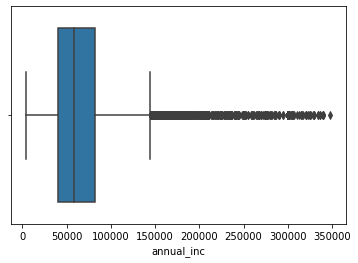

In [44]:
df_new = df[(df['annual_inc'] < 350000)]
sns.boxplot(df_new['annual_inc'])

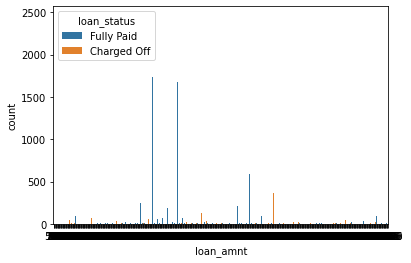

In [50]:
new_df = df[df['loan_amnt'] < 28000] # considering 28000 as the outlier threshold by looking at the boxplot above
sns.countplot(x='loan_amnt',hue='loan_status',data=new_df)
plt.show()#display

### the above plot doesnt gives us much information, so lets bucketize the loan amount to have a clear picture

In [52]:
loan_amoun_bin=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 28000]
loan_amoun_slot=['0-2000','2000-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-28000' '28000 and above']
df['loan_amnt_range']=pd.cut(df['loan_amnt'], loan_amoun_bin, labels=loan_amoun_slot)

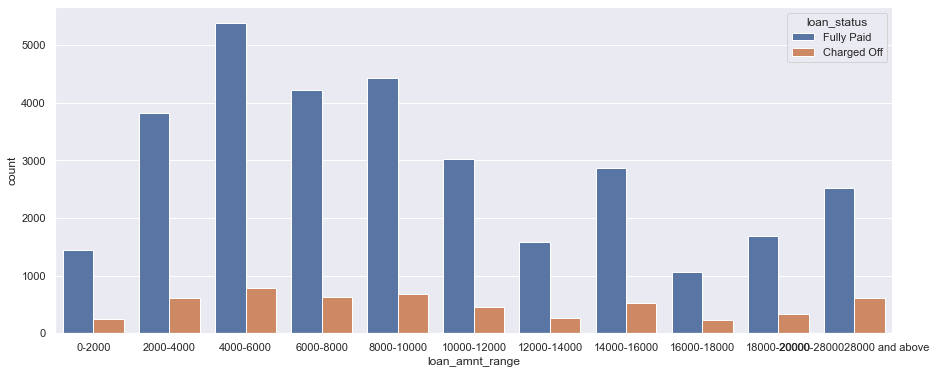

In [55]:
sns.set(rc = {'figure.figsize':(15,6)})
sns.countplot(x='loan_amnt_range',hue='loan_status',data=df)
plt.show()#displa

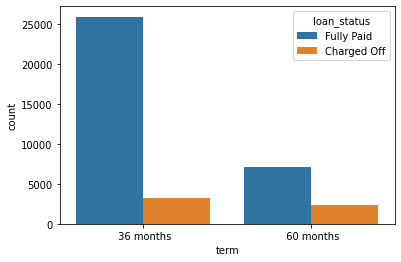

In [46]:
sns.countplot(x='term',hue='loan_status',data=df)
plt.show()


In [56]:
dir

<function dir>